In [1]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#data sugmentation
# Preprocessing the Training set
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.22)
training_set = datagen.flow_from_directory('brain_tumor_dataset',
                                            target_size=(224,224),
                                            color_mode="rgb",
                                            subset="training",
                                            class_mode="binary",
                                            batch_size=32,
                                            shuffle=True)

Found 198 images belonging to 2 classes.


In [4]:
valid_generator=datagen.flow_from_directory( directory="brain_tumor_dataset",
                                                target_size=(224,224),
                                                color_mode="rgb",
                                                subset="validation",
                                                class_mode="binary",
                                                batch_size=32,
                                                shuffle=True)

Found 55 images belonging to 2 classes.


In [5]:
## showing some image from training
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

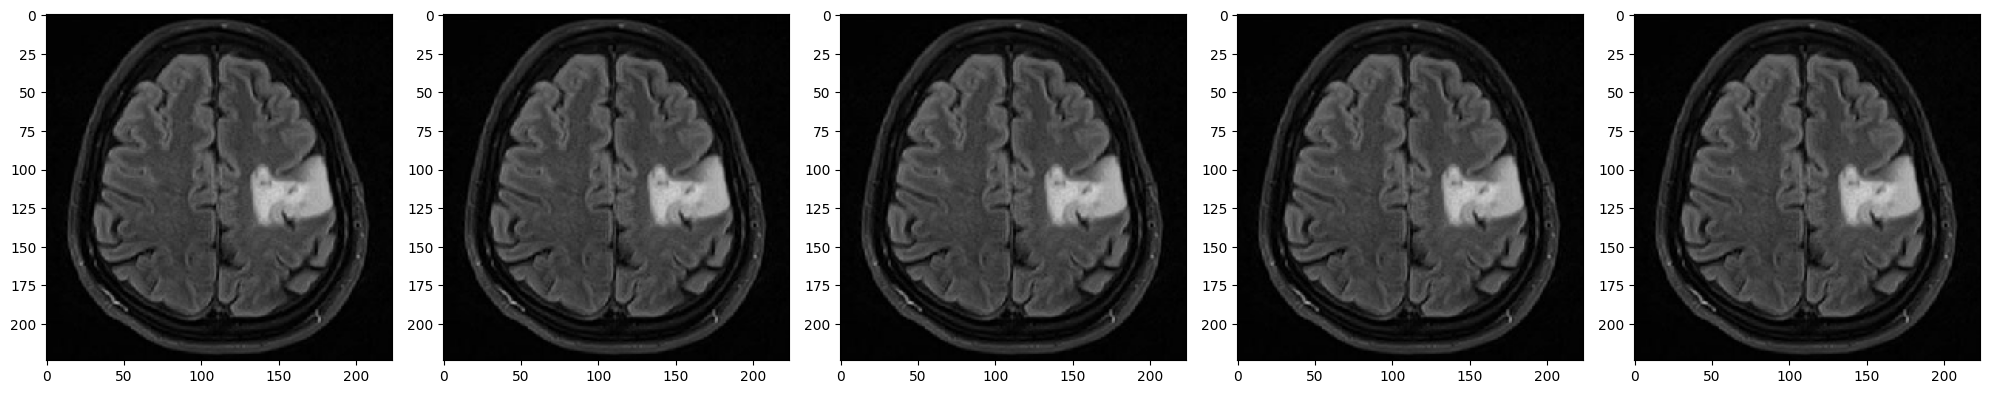

In [6]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [7]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [9]:
import tensorflow_hub as hub 

In [10]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input keep smae

In [11]:
# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

In [13]:
mobile_net.trainable = False

In [14]:
model = tf.keras.models.Sequential([
    mobile_net,
    ### ann layer
    tf.keras.layers.Dense(1, activation='sigmoid') #[0, 1] or [1, 0]
    ])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(
    training_set,
    epochs=10,
    validation_data=valid_generator
    )

Epoch 1/10



7/7 [==============================] - 18s 1s/step - loss: 0.7961 - accuracy: 0.4798 - val_loss: 0.7172 - val_accuracy: 0.5636
Epoch 2/10
7/7 [==============================] - 5s 648ms/step - loss: 0.6867 - accuracy: 0.6010 - val_loss: 0.6340 - val_accuracy: 0.6364
Epoch 3/10
7/7 [==============================] - 5s 640ms/step - loss: 0.5996 - accuracy: 0.6869 - val_loss: 0.5614 - val_accuracy: 0.7273
Epoch 4/10
7/7 [==============================] - 4s 626ms/step - loss: 0.5520 - accuracy: 0.7525 - val_loss: 0.5063 - val_accuracy: 0.7091
Epoch 5/10
7/7 [==============================] - 4s 609ms/step - loss: 0.4878 - accuracy: 0.8030 - val_loss: 0.5013 - val_accuracy: 0.7273
Epoch 6/10
7/7 [==============================] - 4s 611ms/step - loss: 0.4523 - accuracy: 0.8434 - val_loss: 0.4366 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 4s 601ms/step - loss: 0.4247 - accuracy: 0.8333 - val_loss: 0.4106 - val_accuracy: 0.8182
Epoch 8/10
7/7 [=================

In [21]:
# Part 4 - Making a single prediction test
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('brain_tumor_dataset/no/9 no.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result

1/1 [==============================] - 0s 87ms/step


array([[0.33098534]], dtype=float32)

In [22]:
if result[0]<=0.5:
    print("No BrainTumor")
else:
    print("BrainTumor")

No BrainTumor


In [23]:
#save model
from tensorflow.keras.models import load_model
model.save('brain_tumor.h5')

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
